In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [30]:
df.Age.value_counts().sort_index()

25    146
26    148
27    131
28    506
29    192
30     65
31    234
32     91
33    148
34    266
35     60
Name: Age, dtype: int64

In [4]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [5]:
df.shape

(1987, 9)

In [6]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
df.Age.value_counts()

28    506
34    266
31    234
29    192
26    148
33    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

In [8]:
df['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [9]:
for i in df.select_dtypes('object').iloc[:,1:].columns:
    df[i] = df.select_dtypes('object').iloc[:,1:][i].replace(('Yes', 'No'), (1, 0))

df.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


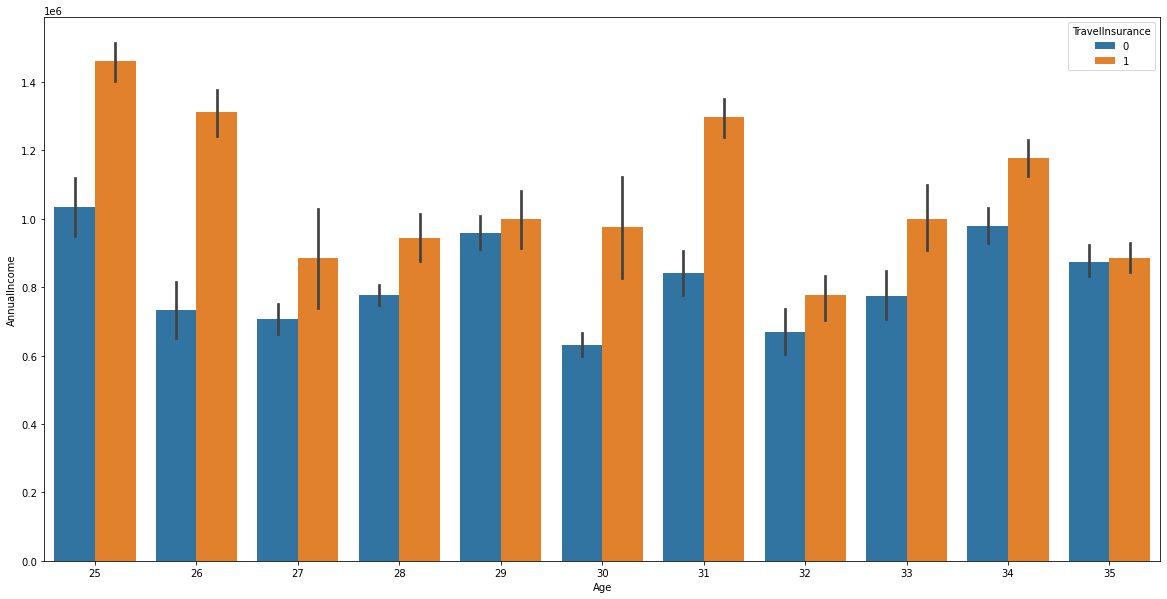

In [10]:
fig, ax = plt.subplots(figsize = (20,10))

sns.barplot(data = df, x = 'Age', y = 'AnnualIncome', hue = 'TravelInsurance')

plt.show()

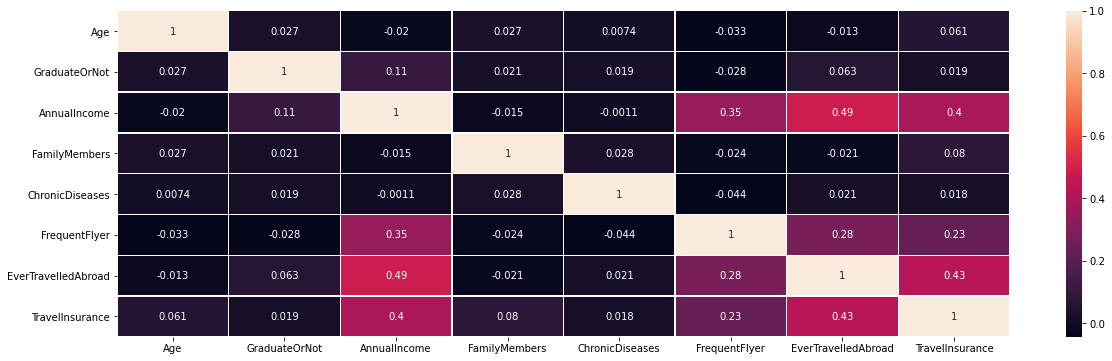

In [11]:
fig, ax = plt.subplots(figsize = (20,6))

sns.heatmap(data = df.corr(), linewidths=.5, annot = True)

plt.show()

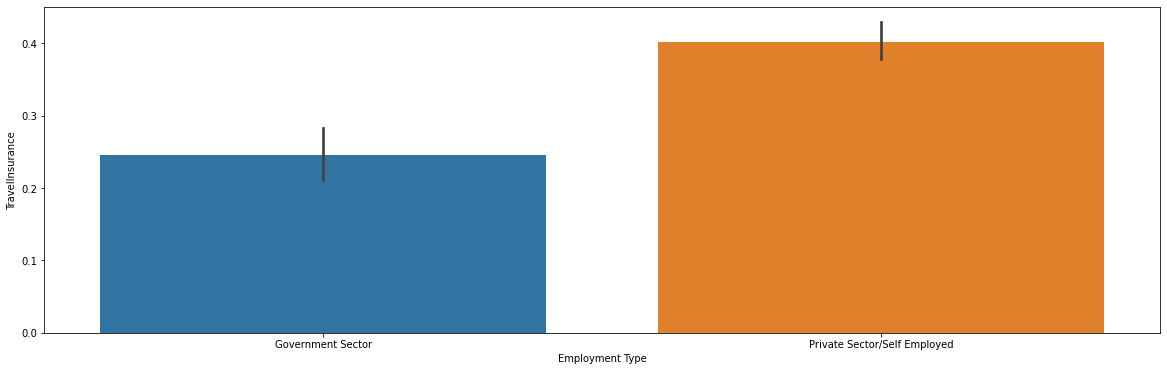

In [12]:
fig, ax = plt.subplots(figsize = (20,6))

sns.barplot(data = df, x = 'Employment Type', y = 'TravelInsurance', estimator=np.mean)

plt.show()

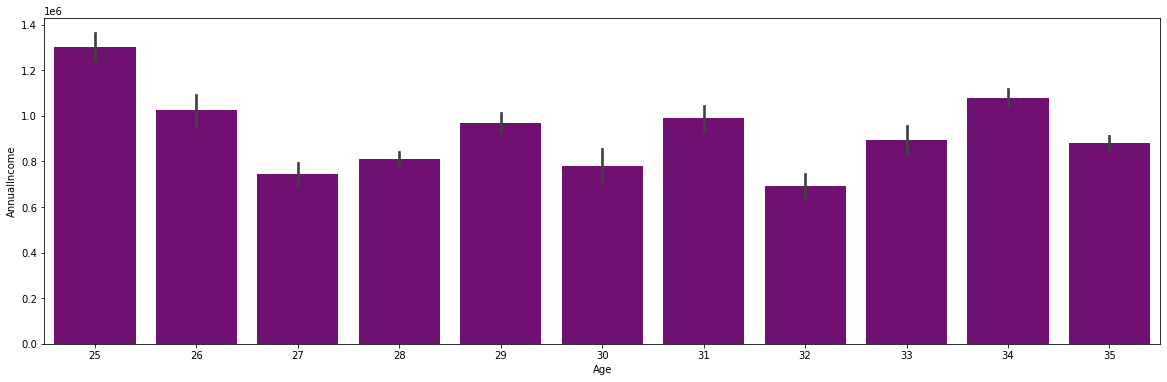

In [13]:
fig, ax = plt.subplots(figsize = (20,6))

sns.barplot(data = df, x = 'Age', y = 'AnnualIncome', color = 'purple')

plt.show()

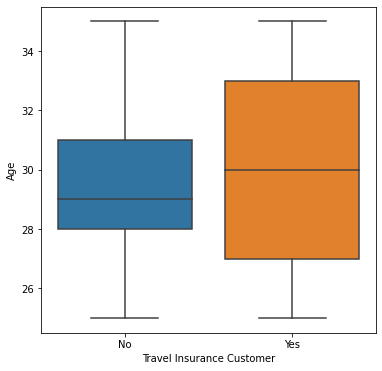

In [48]:
fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot(data = df, x = 'TravelInsurance', y = 'Age')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Travel Insurance Customer')

plt.show()

Al sector de edad en concreto al que atacar sería entre los 28 y 31 años

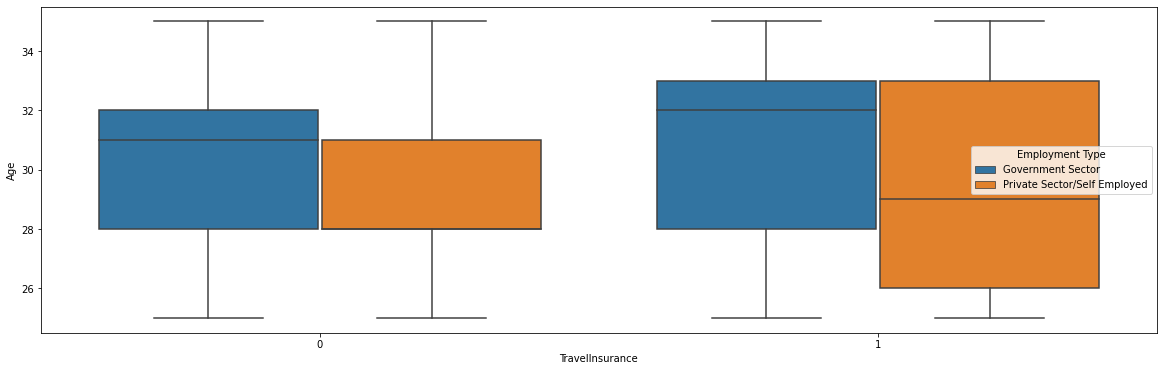

In [15]:
fig, ax = plt.subplots(figsize = (20,6))

sns.boxplot(data = df, x = 'TravelInsurance', y = 'Age', hue="Employment Type")

plt.show()

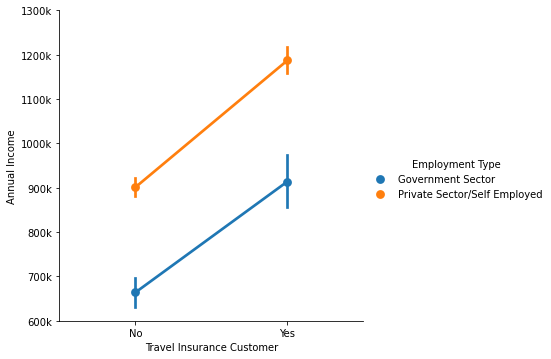

In [42]:
ax = sns.catplot(x="TravelInsurance", y="AnnualIncome", hue="Employment Type", kind="point", data=df)
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels([str(i)+'k' for i in range(600,1400,100)])
ax.set_ylabels('Annual Income')
ax.set_xlabels('Travel Insurance Customer')


plt.show()

El rango de salarios al que atacar seria de entre 0.6 y 1.1

In [69]:
df2 = df.groupby(['TravelInsurance']).mean()
df2


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
TravelInsurance,,,,,,,
0,29.517619,0.846515,8.212999e+05,4.657009,0.271731,0.139389,0.064213
1,29.888732,0.860563,1.133239e+06,4.925352,0.288732,0.336620,0.419718


In [70]:
grad0 = [df2.FrequentFlyer.iloc[0]*100, 100-df2.FrequentFlyer.iloc[0]*100]
lab_grad0 = ['Frequent','Not Frequent']

grad1 = [df2.FrequentFlyer.iloc[1]*100, 100-df2.FrequentFlyer.iloc[1]*100]
lab_grad1 = ['Frequent','Not Frequent']

evertr0 = [df2.EverTravelledAbroad.iloc[0]*100, 100-df2.EverTravelledAbroad.iloc[0]*100]
lab_evertr0 = ['Traveller','Not Traveller']

evertr1 = [df2.EverTravelledAbroad.iloc[1]*100, 100-df2.EverTravelledAbroad.iloc[1]*100]
lab_evertr1 = ['Traveller','Not Traveller']

print(grad0, grad1, evertr0, evertr1)

[13.938919342208301, 86.0610806577917] [33.66197183098591, 66.33802816901408] [6.421299921691465, 93.57870007830853] [41.971830985915496, 58.028169014084504]


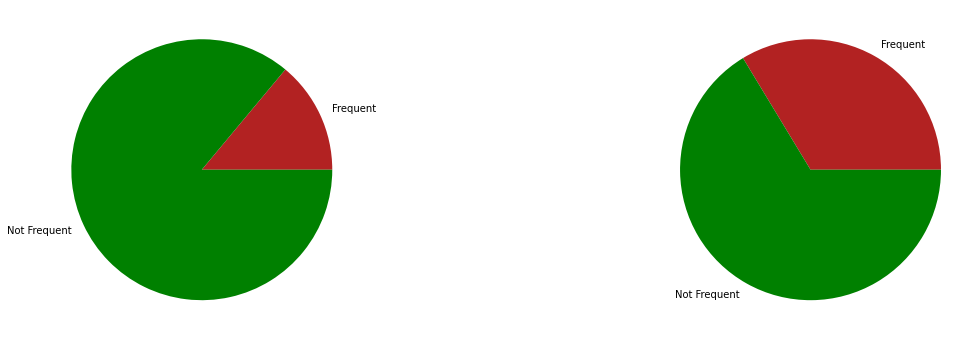

In [65]:
fig, ax = plt.subplots(1, 2,figsize = (20,6))

ax[0].pie(grad0 , labels = lab_grad0, colors = ['firebrick', 'g'])
ax[1].pie(grad1 , labels = lab_grad1, colors = ['firebrick', 'g'])


plt.show()

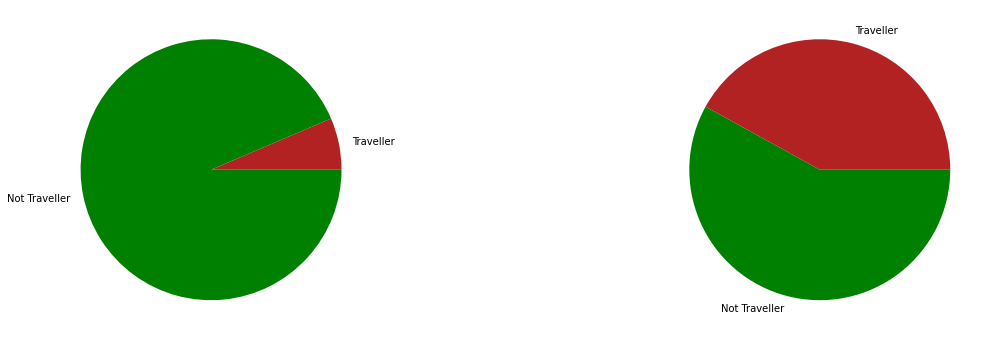

In [66]:
fig, ax = plt.subplots(1, 2,figsize = (20,6))


ax[0].pie(evertr0 , labels = lab_evertr0, colors = ['firebrick', 'g'])
ax[1].pie(evertr1 , labels = lab_evertr1, colors = ['firebrick', 'g'])



plt.show()

Las proporiones distintas quiere decir dos cosas:
- Lo primero, aun tenemos una bolsa de personas que tienen mayor probabilidad de ser clientes atacandoles con este motivo, por ejemplo, en este caso enfatizando la idea de que viajan mucho o al extranjero.
- Por otro lado, tenemos a una bolsa de gente que no consume el seguro y debemos de buscar otra alternativa o estrategia, atacando a otros factores.

Los cleintes viajan mas al extranjero y más frecuentemente

In [20]:
df3 = df.groupby(['Employment Type']).mean()

df3

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Employment Type,,,,,,,,
Government Sector,30.178947,0.922807,7.253509e+05,4.761404,0.285965,0.117544,0.078947,0.245614
Private Sector/Self Employed,29.437544,0.822865,1.016196e+06,4.749471,0.274524,0.247001,0.236415,0.402258


In [21]:
df_client  = df[df['TravelInsurance']==1].copy()
df_client.drop(columns=['TravelInsurance'], inplace = True)

In [22]:
df_client.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
2,34,Private Sector/Self Employed,1,500000,4,1,0,0
7,31,Private Sector/Self Employed,1,1350000,3,0,1,1
8,28,Private Sector/Self Employed,1,1450000,6,1,1,1
11,26,Private Sector/Self Employed,1,1400000,5,0,1,1
12,32,Government Sector,1,850000,6,0,0,0


In [23]:
df_client.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,710.000000,710.000000,7.100000e+02,710.000000,710.000000,710.000000,710.000000
mean,29.888732,0.860563,1.133239e+06,4.925352,0.288732,0.336620,0.419718
std,3.331732,0.346646,3.748447e+05,1.678304,0.453493,0.472887,0.493861
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,8.000000e+05,4.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,1.250000e+06,5.000000,0.000000,0.000000,0.000000
75%,33.000000,1.000000,1.400000e+06,6.000000,1.000000,1.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

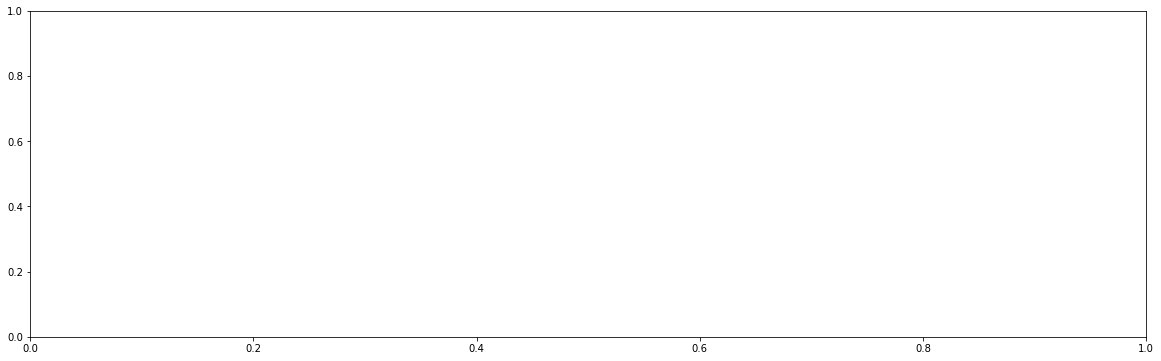

In [24]:
fig, ax = plt.subplots(figsize = (20,6))

sns.boxplot(data = df_client, x = ['GraduateOrNot', ], y = 'Age')

plt.show()

In [ ]:
df_client.groupby(['Employment Type']).mean()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
Employment Type,,,,,,,
Government Sector,29.937209,0.897674,663953.488372,4.623256,0.272093,0.076744,0.044186
Private Sector/Self Employed,29.304604,0.820543,901180.637544,4.674144,0.271547,0.171192,0.074380


Utilizar técnicas de ML no Supervisado para segmentar el mercado.

Posibles variables a tener en cuenta para recoger y mejorar lo análisis:
+ País de destino
+ 